# Token AMR gene overlaps for ECOLI

## Read mapping information

In [1]:
import os

import pandas as pd


demoTrainDf = pd.read_csv(os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240614/data/wb_365_wa_1/splits_v1/demographics/mortality_normal_train.csv', sep='\t')
demoTestDf = pd.read_csv(os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240614/data/wb_365_wa_1/splits_v1/demographics/mortality_normal_test.csv', sep='\t')
demoValidateDf = pd.read_csv(os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240614/data/wb_365_wa_1/splits_v1/demographics/mortality_normal_validate.csv', sep='\t')
demoDf = pd.concat([demoTrainDf, demoTestDf, demoValidateDf], ignore_index=True)
demoDf

,person_id,visit_occurrence_id,TYPE,COUNTRY_OF_BIRTH,SEX,Age_Bin,JOURNEY_ID
0,678487,3312694,Emergency,Australia,Male,"(60, 70]",3312694
1,2094045,9199249,Emergency,Australia,Male,"(20, 30]",9199249
2,2107813,9410987,Emergency,Australia,Male,"(50, 60]",9410987
3,2083212,602890,Inpatient,Australia,Female,"(40, 50]",9039437
4,2083212,9039437,Emergency,Australia,Female,"(40, 50]",9039437
...,...,...,...,...,...,...,...
7194,2603535,16588204,Inpatient,Australia,Male,"(60, 70]",16588204
7195,2603535,16709341,Inpatient,Australia,Male,"(60, 70]",16709341
7196,2603535,16651755,Inpatient,Australia,Male,"(60, 70]",16651755
7197,2098616,16872774,Emergency,Australia,Female,"(80, 90]",16872774


In [2]:
import os

mappingDf = pd.read_csv(os.environ['GENOMICS_DATA_BASE'] + '/patient_tube_id_mapping_full.tsv', sep='\t')
mappingDf

,tube_code,PATIENT_ID,db_ID,pt_age,pt_gender,EPISODE_ID,hospital_admission,hospital_discharge,hospital_in_last_year,genome_species,species_reported,contig_number,length,tube_code_duplicate_or_old,date_of_collection,ID_number,location_additional_02,collected_from_original
0,AH19J072,213972.0,3JNQS,64,Male,12931474.0,2019-10-17,2019-11-29,yes,Escherichia coli,Escherichia coli,92,5131021,NaN,2019-10-30,19-303-0997,A-7EA;HAEM,Blood
1,AH19J074,213972.0,3JNQS,64,Male,12931474.0,2019-10-17,2019-11-29,yes,Streptococcus sp. D19,Streptococcus mitis group,84,2022991,NaN,2019-10-30,19-303-1174,A-7EA;HAEM,Blood Peripheral
2,AH19B003,526238.0,567AE,85,Male,640261.0,2019-02-04,2019-02-07,no,Escherichia coli,Escherichia coli,93,4942915,NaN,2019-02-03,19-034-1596,A-4WB;GMC,Blood
3,AH20A024,788941.0,3YBDS,58,Female,13194824.0,2020-01-16,2020-01-19,no,Escherichia coli,Escherichia coli,110,5149157,NaN,2020-01-16,20-016-2112,S-ED;Emergency,Blood Venous
4,AH20L041,1023735.0,2VJ78,42,Male,14210147.0,2020-12-18,2021-01-05,yes,Staphylococcus aureus,Staphylococcus aureus,46,2735216,NaN,2020-12-16,20-351-2856,Emergency Dept;nan,Blood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112,ALF22L076,639020.0,3S6HL,84,Male,17219899.0,2022-12-15,2022-12-20,yes,Streptococcus vestibularis,Streptococcus salivarius group,107,1938627,NaN,2022-12-15,22-349-2150,Ward 4WB,Blood Peripheral
3113,ALF22L089,655404.0,6EWBM,67,Female,NaN,NaN,NaN,NaN,Proteus columbae,Proteus vulgaris,152,3972219,NaN,2022-12-17,22-351-1465,Comm/Amb Clinic,Blood
3114,ALF22L138,2572048.0,YM5PJ,61,Male,NaN,NaN,NaN,NaN,Enterobacter roggenkampii,Enterobacter cloacae complex,66,4876179,NaN,2022-12-27,22-361-0202,Ward 7 East,Hick White Lum
3115,ALF23A102,2054964.0,5DYAH,35,Female,17294287.0,2023-01-12,2023-02-01,yes,Streptococcus constellatus,Streptococcus anginosus group,54,1869828,NaN,2023-01-11,23-011-3305,ICU,Blood Venous


In [3]:
mappedJourneyTubeIdsDf = mappingDf[['tube_code', 'PATIENT_ID', 'EPISODE_ID']].drop_duplicates().merge(
    demoDf[['person_id', 'visit_occurrence_id', 'JOURNEY_ID']],
    how='inner',
    left_on=['PATIENT_ID', 'EPISODE_ID'],
    right_on=['person_id', 'visit_occurrence_id']
).drop(
    columns=['PATIENT_ID', 'EPISODE_ID', 'visit_occurrence_id']
)[['person_id', 'JOURNEY_ID', 'tube_code']].drop_duplicates()
mappedJourneyTubeIdsDf

,person_id,JOURNEY_ID,tube_code
0,50056,13224842,AH20B011
1,62567,12645629,AH19G065
2,138108,14737781,AH21E052
3,211314,13955099,AH20J009
4,211314,13955099,KPN2214
...,...,...,...
512,2084373,16158768,ALF22C004
513,1058066,16759482,ALF22H089
514,2552781,16966609,ALF22J054
515,2638484,16969999,ALF22K143


## Read token files

In [4]:
import os
import pandas as pd
from pathlib import Path


bedDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_nlp_tokens', 'bed_files', 'ECOLI')

bedDfs = {}
for bedFile in os.listdir(bedDir):
    df = pd.read_csv(Path(bedDir, bedFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score'])
    bedDfs[bedFile.split('_')[0]] = df

## Read amrfinder annotations

In [5]:
import os

import pandas as pd

from pathlib import Path


amrfinderDir = Path(os.environ['GENOMICS_DATA_BASE'], 'amrfinder')

overlappingDfList = []

for tubeId, bedDf in bedDfs.items():
    amrfinderFile = Path(amrfinderDir, tubeId + '_amr_results.txt')
    if(amrfinderFile.exists()):
        amrfinderDf = pd.read_csv(amrfinderFile, sep='\t')
        mergedDf = bedDf.merge(
            amrfinderDf,
            how='inner',
            left_on = ['contig_id'],
            right_on = ['Contig id'],
        )
        mergedDf['tube_code'] = tubeId
        tempOverlappingDf = mergedDf[(mergedDf.start_position >= mergedDf.Start) & (mergedDf.end_position <= mergedDf.Stop)]
        overlappingDfList.append(tempOverlappingDf)

overlappingDf = pd.concat(overlappingDfList, ignore_index=True)
overlappingDf

,contig_id,start_position,end_position,tokens,score,Protein identifier,Contig id,Start,Stop,Strand,...,Target length,Reference sequence length,% Coverage of reference sequence,% Identity to reference sequence,Alignment length,Accession of closest sequence,Name of closest sequence,HMM id,HMM description,tube_code
0,1,203791,203794,AGAG,-0.022805,NaN,1,203788,204918,-,...,377,377,100.0,98.94,377,WP_001443153.1,cephalosporin-hydrolyzing class C beta-lactama...,NaN,NaN,AH21B049
1,1,203795,203800,TGTTGA,0.016484,NaN,1,203788,204918,-,...,377,377,100.0,98.94,377,WP_001443153.1,cephalosporin-hydrolyzing class C beta-lactama...,NaN,NaN,AH21B049
2,1,203801,203803,GAA,0.020297,NaN,1,203788,204918,-,...,377,377,100.0,98.94,377,WP_001443153.1,cephalosporin-hydrolyzing class C beta-lactama...,NaN,NaN,AH21B049
3,1,203804,203810,TCTGCCA,-0.004617,NaN,1,203788,204918,-,...,377,377,100.0,98.94,377,WP_001443153.1,cephalosporin-hydrolyzing class C beta-lactama...,NaN,NaN,AH21B049
4,1,203811,203819,GGCGGCGGT,-0.014536,NaN,1,203788,204918,-,...,377,377,100.0,98.94,377,WP_001443153.1,cephalosporin-hydrolyzing class C beta-lactama...,NaN,NaN,AH21B049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080018,4,132217,132223,GAGAGTT,0.039144,NaN,4,131127,132257,+,...,377,377,100.0,98.94,377,AAZ85965.1,cephalosporin-hydrolyzing class C beta-lactama...,NaN,NaN,ALF22C077
1080019,4,132224,132232,ACCGCCGCC,0.016664,NaN,4,131127,132257,+,...,377,377,100.0,98.94,377,AAZ85965.1,cephalosporin-hydrolyzing class C beta-lactama...,NaN,NaN,ALF22C077
1080020,4,132233,132238,TGGCAG,0.024372,NaN,4,131127,132257,+,...,377,377,100.0,98.94,377,AAZ85965.1,cephalosporin-hydrolyzing class C beta-lactama...,NaN,NaN,ALF22C077
1080021,4,132239,132248,ATTCTCAACA,0.035505,NaN,4,131127,132257,+,...,377,377,100.0,98.94,377,AAZ85965.1,cephalosporin-hydrolyzing class C beta-lactama...,NaN,NaN,ALF22C077


In [6]:
overlappingDf[['contig_id', 'Gene symbol', 'Sequence name']]

,contig_id,Gene symbol,Sequence name
0,1,blaEC,BlaEC family class C beta-lactamase
1,1,blaEC,BlaEC family class C beta-lactamase
2,1,blaEC,BlaEC family class C beta-lactamase
3,1,blaEC,BlaEC family class C beta-lactamase
4,1,blaEC,BlaEC family class C beta-lactamase
...,...,...,...
1080018,4,blaEC,BlaEC family class C beta-lactamase
1080019,4,blaEC,BlaEC family class C beta-lactamase
1080020,4,blaEC,BlaEC family class C beta-lactamase
1080021,4,blaEC,BlaEC family class C beta-lactamase


## All overlap analysis

### Feature type wise overlapping counts

In [7]:
overlappingDf['Element type'].value_counts()

Element type
VIRULENCE    703610
AMR          319290
STRESS        57123
Name: count, dtype: int64

<Axes: xlabel='Element type'>

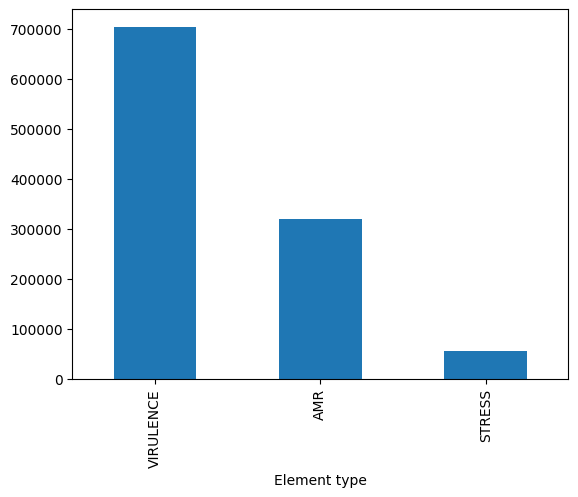

In [8]:
overlappingDf['Element type'].value_counts().plot(kind = 'bar')

### Overall

In [14]:
overlappingDf[['contig_id', 'Gene symbol', 'Sequence name']].groupby(by=['Gene symbol', 'Sequence name']).agg('count').reset_index().rename(columns={'contig_id': 'total_count'}).sort_values(by=['total_count'], ascending=False)[:10]

,Gene symbol,Sequence name,total_count
2,acrF,multidrug efflux RND transporter permease subu...,248855
66,sslE,lipoprotein metalloprotease SslE,183541
33,fdeC,intimin-like adhesin FdeC,111742
70,ybtP,yersiniabactin ABC transporter ATP-binding/per...,100541
71,ybtQ,yersiniabactin ABC transporter ATP-binding/per...,100227
69,vactox,vacuolating autotransporter toxin Vat,36008
56,papC,P fimbrial usher protein PapC,32862
11,blaEC,BlaEC family class C beta-lactamase,27596
30,espX1,type III secretion system effector EspX1,23340
7,asr,acid resistance repetitive basic protein Asr,23325


### Virulence

In [13]:
overlappingDf[overlappingDf['Element type'] == 'VIRULENCE'][['contig_id', 'Gene symbol', 'Sequence name']].groupby(by=['Gene symbol', 'Sequence name']).agg('count').reset_index().rename(columns={'contig_id': 'total_count'}).sort_values(by=['total_count'], ascending=False)[:10]

,Gene symbol,Sequence name,total_count
46,sslE,lipoprotein metalloprotease SslE,183541
16,fdeC,intimin-like adhesin FdeC,111742
49,ybtP,yersiniabactin ABC transporter ATP-binding/per...,100541
50,ybtQ,yersiniabactin ABC transporter ATP-binding/per...,100227
48,vactox,vacuolating autotransporter toxin Vat,36008
37,papC,P fimbrial usher protein PapC,32862
13,espX1,type III secretion system effector EspX1,23340
21,ireA,TonB-dependent siderophore receptor IreA,20642
40,papG-II,P fimbria tip G-adhesin PapG-II,12281
19,ibeA,putative intracellular survival FAD-dependent ...,12206


### AMR

In [15]:
overlappingDf[overlappingDf['Element type'] == 'AMR'][['contig_id', 'Gene symbol', 'Sequence name']].groupby(by=['Gene symbol', 'Sequence name']).agg('count').reset_index().rename(columns={'contig_id': 'total_count'}).sort_values(by=['total_count'], ascending=False)[:10]

,Gene symbol,Sequence name,total_count
2,acrF,multidrug efflux RND transporter permease subu...,248855
5,blaEC,BlaEC family class C beta-lactamase,27596
11,emrD,multidrug efflux MFS transporter EmrD,22060
12,mdtM,multidrug efflux MFS transporter MdtM,14160
6,blaEC-5,cephalosporin-hydrolyzing class C beta-lactama...,4075
1,aadA1,ANT(3'')-Ia family aminoglycoside nucleotidylt...,600
13,sat2,streptothricin N-acetyltransferase Sat2,407
4,blaCTX-M-15,extended-spectrum class A beta-lactamase CTX-M-15,379
10,dfrA1,trimethoprim-resistant dihydrofolate reductase...,345
3,blaCTX-M-15,class A extended-spectrum beta-lactamase CTX-M-15,252


### Stress

In [16]:
overlappingDf[overlappingDf['Element type'] == 'STRESS'][['contig_id', 'Gene symbol', 'Sequence name']].groupby(by=['Gene symbol', 'Sequence name']).agg('count').reset_index().rename(columns={'contig_id': 'total_count'}).sort_values(by=['total_count'], ascending=False)[:10]

,Gene symbol,Sequence name,total_count
3,asr,acid resistance repetitive basic protein Asr,23325
4,emrE,multidrug efflux SMR transporter EmrE,22681
6,ymgB,biofilm/acid-resistance regulator AriR,6131
0,arsC,glutaredoxin-dependent arsenate reductase,3218
1,arsD,arsenite efflux transporter metallochaperone ArsD,1132
2,arsR,As(III)-sensing metalloregulatory transcriptio...,507
5,fieF,CDF family cation-efflux transporter FieF,129


## High-score overlap analysis

### Obtain high-score cutoff

In [17]:
highscoreCutoff = overlappingDf.score.mean() + 2 * overlappingDf.score.std()
highscoreCutoff

np.float64(0.07331574815251582)

### Create overlaps dataframe for high-score genes

In [18]:
highscoreOverlappingDf = overlappingDf[overlappingDf.score > highscoreCutoff]
highscoreOverlappingDf

,contig_id,start_position,end_position,tokens,score,Protein identifier,Contig id,Start,Stop,Strand,...,Target length,Reference sequence length,% Coverage of reference sequence,% Identity to reference sequence,Alignment length,Accession of closest sequence,Name of closest sequence,HMM id,HMM description,tube_code
281,1,395434,395439,GAACGT,0.107013,NaN,1,394617,395984,+,...,456,456,100.0,97.81,456,AAF98391.2,putative intracellular survival FAD-dependent ...,NaN,NaN,AH21B049
285,1,395462,395464,TGT,0.081969,NaN,1,394617,395984,+,...,456,456,100.0,97.81,456,AAF98391.2,putative intracellular survival FAD-dependent ...,NaN,NaN,AH21B049
293,1,395513,395518,GCCATG,0.083727,NaN,1,394617,395984,+,...,456,456,100.0,97.81,456,AAF98391.2,putative intracellular survival FAD-dependent ...,NaN,NaN,AH21B049
328,1,395754,395758,CTTAT,0.095976,NaN,1,394617,395984,+,...,456,456,100.0,97.81,456,AAF98391.2,putative intracellular survival FAD-dependent ...,NaN,NaN,AH21B049
362,4,5817,5822,GACATC,0.082578,NaN,4,5811,10370,-,...,1520,1520,100.0,92.43,1520,ADE89421.1,lipoprotein metalloprotease SslE,NaN,NaN,AH21B049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079792,5,348766,348772,ACCAGGC,0.073484,NaN,5,346159,349260,+,...,1034,1034,100.0,99.52,1034,AAC76298.1,multidrug efflux RND transporter permease subu...,NaN,NaN,AH19C036
1079813,5,348921,348929,AATGACGTC,0.085540,NaN,5,346159,349260,+,...,1034,1034,100.0,99.52,1034,AAC76298.1,multidrug efflux RND transporter permease subu...,NaN,NaN,AH19C036
1079817,5,348947,348952,GCTAAC,0.100045,NaN,5,346159,349260,+,...,1034,1034,100.0,99.52,1034,AAC76298.1,multidrug efflux RND transporter permease subu...,NaN,NaN,AH19C036
1079836,5,349071,349076,CGTCCT,0.098261,NaN,5,346159,349260,+,...,1034,1034,100.0,99.52,1034,AAC76298.1,multidrug efflux RND transporter permease subu...,NaN,NaN,AH19C036


### Feature type wise overlapping counts

In [21]:
overlappingDf['Element type'].value_counts()

Element type
VIRULENCE    703610
AMR          319290
STRESS        57123
Name: count, dtype: int64

In [22]:
highscoreOverlappingDf['Element type'].value_counts()

Element type
VIRULENCE    29175
AMR          11047
STRESS        1951
Name: count, dtype: int64

<Axes: xlabel='Element type'>

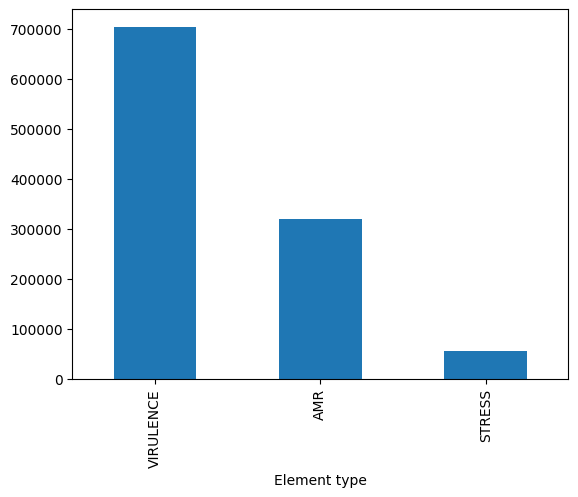

In [23]:
overlappingDf['Element type'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Element type'>

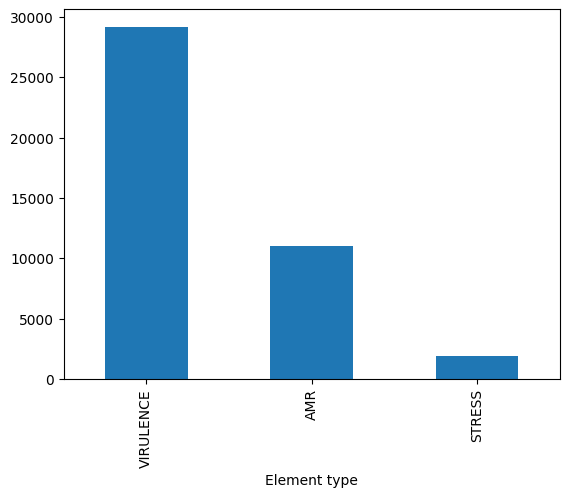

In [24]:
highscoreOverlappingDf['Element type'].value_counts().plot(kind = 'bar')

### Top genes

#### Overall

In [25]:
highscoreOverlappingDf[['contig_id', 'Gene symbol', 'Sequence name']].groupby(by=['Gene symbol', 'Sequence name']).agg('count').reset_index().rename(columns={'contig_id': 'total_count'}).sort_values(by=['total_count'], ascending=False)[:10]

,Gene symbol,Sequence name,total_count
2,acrF,multidrug efflux RND transporter permease subu...,8708
62,sslE,lipoprotein metalloprotease SslE,7638
30,fdeC,intimin-like adhesin FdeC,5423
66,ybtP,yersiniabactin ABC transporter ATP-binding/per...,4205
67,ybtQ,yersiniabactin ABC transporter ATP-binding/per...,4100
52,papC,P fimbrial usher protein PapC,1360
65,vactox,vacuolating autotransporter toxin Vat,1159
7,asr,acid resistance repetitive basic protein Asr,905
11,blaEC,BlaEC family class C beta-lactamase,896
27,espX1,type III secretion system effector EspX1,823


#### Virulence

In [26]:
overlappingDf[overlappingDf['Element type'] == 'VIRULENCE'][['contig_id', 'Gene symbol', 'Sequence name']].groupby(by=['Gene symbol', 'Sequence name']).agg('count').reset_index().rename(columns={'contig_id': 'total_count'}).sort_values(by=['total_count'], ascending=False)[:10]

,Gene symbol,Sequence name,total_count
46,sslE,lipoprotein metalloprotease SslE,183541
16,fdeC,intimin-like adhesin FdeC,111742
49,ybtP,yersiniabactin ABC transporter ATP-binding/per...,100541
50,ybtQ,yersiniabactin ABC transporter ATP-binding/per...,100227
48,vactox,vacuolating autotransporter toxin Vat,36008
37,papC,P fimbrial usher protein PapC,32862
13,espX1,type III secretion system effector EspX1,23340
21,ireA,TonB-dependent siderophore receptor IreA,20642
40,papG-II,P fimbria tip G-adhesin PapG-II,12281
19,ibeA,putative intracellular survival FAD-dependent ...,12206


#### AMR

In [27]:
overlappingDf[overlappingDf['Element type'] == 'AMR'][['contig_id', 'Gene symbol', 'Sequence name']].groupby(by=['Gene symbol', 'Sequence name']).agg('count').reset_index().rename(columns={'contig_id': 'total_count'}).sort_values(by=['total_count'], ascending=False)[:10]

,Gene symbol,Sequence name,total_count
2,acrF,multidrug efflux RND transporter permease subu...,248855
5,blaEC,BlaEC family class C beta-lactamase,27596
11,emrD,multidrug efflux MFS transporter EmrD,22060
12,mdtM,multidrug efflux MFS transporter MdtM,14160
6,blaEC-5,cephalosporin-hydrolyzing class C beta-lactama...,4075
1,aadA1,ANT(3'')-Ia family aminoglycoside nucleotidylt...,600
13,sat2,streptothricin N-acetyltransferase Sat2,407
4,blaCTX-M-15,extended-spectrum class A beta-lactamase CTX-M-15,379
10,dfrA1,trimethoprim-resistant dihydrofolate reductase...,345
3,blaCTX-M-15,class A extended-spectrum beta-lactamase CTX-M-15,252


#### Stress

In [28]:
overlappingDf[overlappingDf['Element type'] == 'STRESS'][['contig_id', 'Gene symbol', 'Sequence name']].groupby(by=['Gene symbol', 'Sequence name']).agg('count').reset_index().rename(columns={'contig_id': 'total_count'}).sort_values(by=['total_count'], ascending=False)[:10]

,Gene symbol,Sequence name,total_count
3,asr,acid resistance repetitive basic protein Asr,23325
4,emrE,multidrug efflux SMR transporter EmrE,22681
6,ymgB,biofilm/acid-resistance regulator AriR,6131
0,arsC,glutaredoxin-dependent arsenate reductase,3218
1,arsD,arsenite efflux transporter metallochaperone ArsD,1132
2,arsR,As(III)-sensing metalloregulatory transcriptio...,507
5,fieF,CDF family cation-efflux transporter FieF,129
